<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/03_normative_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normative Finance

### Uncertainty and Risk

In [1]:
import numpy as np

In [2]:
S0 = 10
B0 = 10

In [3]:
S1 = np.array((20, 5))
B1 = np.array((11, 11))

In [4]:
M0 = np.array((S0, B0))
M0

array([10, 10])

In [5]:
M1 = np.array((S1, B1)).T
M1

array([[20, 11],
       [ 5, 11]])

In [6]:
K = 14.5

In [7]:
C1 = np.maximum(S1 - K, 0)
C1

array([5.5, 0. ])

In [8]:
phi = np.linalg.solve(M1, C1)
phi

array([ 0.36666667, -0.16666667])

In [9]:
np.allclose(C1, np.dot(M1, phi))

True

In [10]:
C0 = np.dot(M0, phi)
C0

2.0

## Expected Utility Theory

In [11]:
def u(x):
    return np.sqrt(x)

In [12]:
phi_A = np.array((0.75, 0.25))
phi_D = np.array((0.25, 0.75))

In [13]:
np.dot(M0, phi_A) == np.dot(M0, phi_D)

True

In [14]:
A1 = np.dot(M1, phi_A)
A1

array([17.75,  6.5 ])

In [15]:
D1 = np.dot(M1, phi_D)
D1

array([13.25,  9.5 ])

In [16]:
P = np.array((0.5, 0.5))

In [17]:
def EUT(x):
    return np.dot(P, u(x))

In [18]:
EUT(A1)

3.381292321692286

In [19]:
EUT(D1)

3.3611309730623735

In [20]:
from scipy.optimize import minimize

In [21]:
w = 10

In [22]:
cons = {'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w}

In [23]:
def EUT_(phi):
    x = np.dot(M1, phi)
    return EUT(x)

In [24]:
opt = minimize(lambda phi: -EUT_(phi),
               x0=phi_A,
               constraints=cons)

In [25]:
opt

     fun: -3.385015999493397
     jac: array([-1.69249132, -1.69253424])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.61122474, 0.38877526])

In [26]:
EUT_(opt['x'])

3.385015999493397

In [27]:
np.dot(M0, opt['x'])

10.0

## Mean-Variance Portfolio Theory

In [28]:
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [29]:
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [30]:
def mu(rX):
    return np.dot(P, rX)

In [31]:
mu(rS)

0.25

In [32]:
mu(rB)

0.10000000000000009

In [33]:
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [34]:
mu(rM)

array([0.25, 0.1 ])

In [35]:
def var(rX):
    return ((rX - mu(rX)) ** 2).mean()

In [36]:
var(rS)

0.5625

In [38]:
var(rB)

0.0

In [39]:
def sigma(rX):
    return np.sqrt(var(rX))

In [40]:
sigma(rS)

0.75

In [41]:
sigma(rB)

0.0

In [45]:
np.cov(rM.T, aweights=P, ddof=0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [48]:
phi = np.array((0.5, 0.5))

In [49]:
def mu_phi(phi):
    return np.dot(phi, mu(rM))

In [50]:
mu_phi(phi)

0.17500000000000004

In [51]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P, ddof=0)
    return np.dot(phi, np.dot(cv, phi))

In [52]:
var_phi(phi)

0.140625

In [53]:
def sigma_phi(phi):
    return var_phi(phi) ** 0.5

In [56]:
sigma_phi(phi)

0.375

In [57]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [58]:
phi_mcs = np.random.random((2, 200))

In [66]:
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T

In [67]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi))
                for phi in phi_mcs])

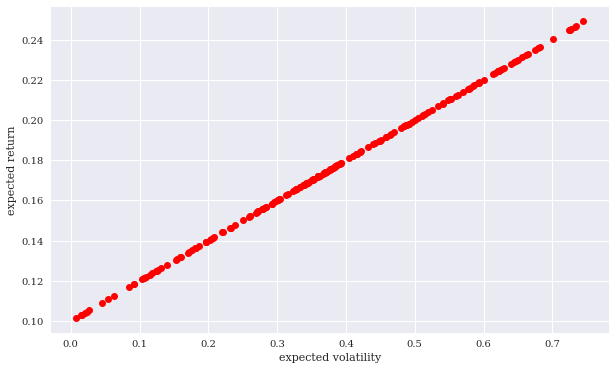

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return');

In [69]:
P = np.ones(3) / 3
P

array([0.33333333, 0.33333333, 0.33333333])

In [70]:
S1 = np.array((20, 10, 5))

In [71]:
T0 = 10
T1 = np.array((1, 12, 13))

In [72]:
M0 = np.array((S0, T0))
M0

array([10, 10])

In [73]:
M1 = np.array((S1, T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])